![example](images/director_shot.jpeg)

# Data Cleaning


In [98]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

%matplotlib inline

In [99]:
gross_df  = pd.read_csv('./bom.movie_gross.csv')
names_df  = pd.read_csv('./imdb.name.basics.csv')
akas_df   = pd.read_csv('./imdb.title.akas.csv')


## Basics

In [156]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,Total Gross Revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [101]:
names_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [102]:
akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [103]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
#isolate the missing movies in the foreign to see if they are corr to the domestic gross

In [104]:
akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [105]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


## Missing Values

In [106]:
gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [107]:
names_df.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [108]:
akas_df.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [109]:
#checking for duplicates
gross_df.duplicated().sum()

0

In [110]:
names_df.duplicated().sum()

0

In [111]:
akas_df.duplicated().sum()

0

In [112]:
#Replacing the missing studio values with "Unknown"
gross_df = gross_df.fillna({'studio':'Unknown'})

In [113]:
#Replacing the comma values in "foreign-gross"
gross_df['foreign_gross'].replace(',','', regex=True, inplace=True)

In [114]:
gross_df["foreign_gross"]= gross_df['foreign_gross'].astype(float)
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [115]:
gross_df['Total Gross Revenue']=gross_df['domestic_gross'] + gross_df['foreign_gross']

In [116]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,Total Gross Revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [117]:
#Filtering the studios by the ones that made more than 100 titles / moives
main_st_df= gross_df[gross_df["studio"].map(gross_df['studio'].value_counts()) > 100]
main_st_df

,title,studio,domestic_gross,foreign_gross,year,Total Gross Revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
...,...,...,...,...,...,...
3361,A Ciambra,IFC,41900.0,NaN,2018,NaN
3369,Loving Pablo,Uni.,22000.0,NaN,2018,NaN
3374,The Escape,IFC,14000.0,NaN,2018,NaN
3382,The Quake,Magn.,6200.0,NaN,2018,NaN


## Top Ten Studios with largest Average Total Gross Revenue

<BarContainer object of 10 artists>

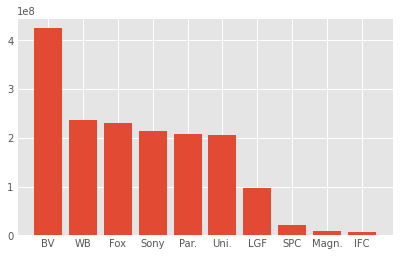

In [118]:
#Barchart for the mean total gross of the studios that made more than 100 titles
fig, ax =plt.subplots()

mpl.style.use('fivethirtyeight')

x= main_st_df.groupby('studio')['Total Gross Revenue'].mean().sort_values(ascending=False)[:10].index
y= main_st_df.groupby('studio')['Total Gross Revenue'].mean().sort_values(ascending=False)[:10].values
ax.bar(x,y)

In [119]:
# For studios with movie outputs of greater than 100 titles, 
# BV stands out as the studio with the largest average total gross revenue

## Top Ten Studios with largest Total Gross Revenue

<BarContainer object of 10 artists>

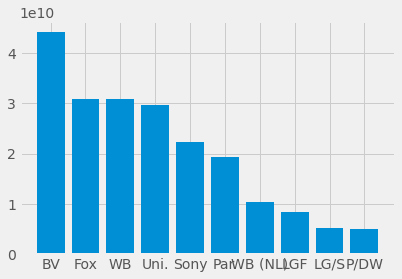

In [120]:
fig, ax =plt.subplots()

mpl.style.use('ggplot')

x= gross_df.groupby('studio')['Total Gross Revenue'].sum().sort_values(ascending=False)[:10].index
y= gross_df.groupby('studio')['Total Gross Revenue'].sum().sort_values(ascending=False)[:10].values
ax.bar(x,y)

In [121]:
# BV still stands as the studio with the largest Total gross revenue

In [122]:
corr = gross_df.corr()
corr.style.background_gradient(cmap = "coolwarm")

,domestic_gross,foreign_gross,year,Total Gross Revenue
domestic_gross,1.000000,0.767991,0.018708,0.904548
foreign_gross,0.767991,1.000000,0.145653,0.967759
year,0.018708,0.145653,1.000000,0.143127
Total Gross Revenue,0.904548,0.967759,0.143127,1.000000


## Top Ten Movies by Domestic Gross Revenue

In [154]:
#Sorting by domestic_gross
top_gross_dom_df= gross_df.sort_values('domestic_gross', ascending=False)

In [155]:
#top_domestic_ gross dataset
top_gross_dom_df[:10]

,title,studio,domestic_gross,foreign_gross,year,Total Gross Revenue
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08
1873,Jurassic World,Uni.,652300000.0,1019.4,2015,6.523010e+08
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09


## What movie and year had the highest domestic gross revenue generation?

In [125]:
top_gross_dom_df[:1]["title"].tolist()

['Star Wars: The Force Awakens']

In [126]:
top_gross_dom_df[:1]["year"].tolist()

[2015]

In [127]:
#List of the top ten movies with the most domestic gross revenue
top_10_dom = top_gross_dom_df['title'][:10].values.tolist()
top_10_dom

['Star Wars: The Force Awakens',
 'Black Panther',
 'Avengers: Infinity War',
 'Jurassic World',
 "Marvel's The Avengers",
 'Star Wars: The Last Jedi',
 'Incredibles 2',
 'Rogue One: A Star Wars Story',
 'Beauty and the Beast (2017)',
 'Finding Dory']

## Top Ten Studios with largest Average Domestic Gross Revenue

<BarContainer object of 10 artists>

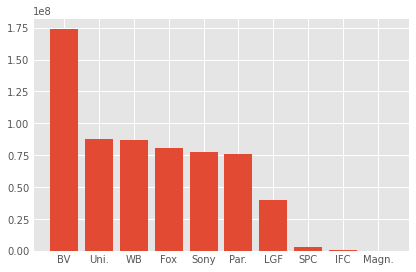

In [128]:
#Barchart for the mean total domestic gross of the studios that made more than 100 titles
fig, ax =plt.subplots()

mpl.style.use('fivethirtyeight')

x= main_st_df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False)[:10].index
y= main_st_df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False)[:10].values
ax.bar(x,y)

In [129]:
# Almost the same as the comparison made with the Total gross revenue

## Top Ten Movies by Domestic Revenue

<BarContainer object of 10 artists>

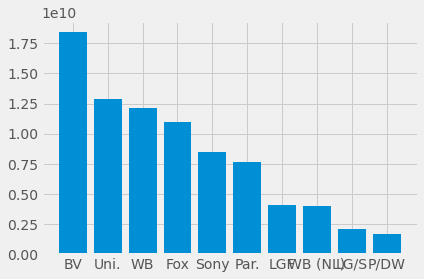

In [130]:
fig, ax =plt.subplots()

mpl.style.use('ggplot')

x= gross_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)[:10].index
y= gross_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)[:10].values
ax.bar(x,y)

In [131]:
# Domestic revenue generated seems to be uniformly distributed among the top ten studios

## Scatter for Top Domestic Vs Foreign Gross Revenue

Text(0.5, 1.0, 'Top Domestic Vs Foreign Gross Revenue')

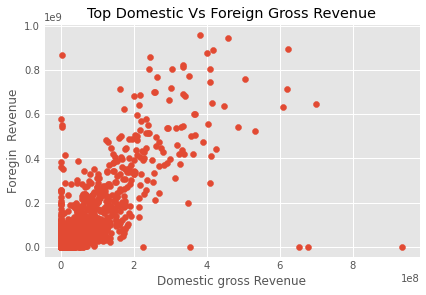

In [132]:
fig, ax = plt.subplots()

mpl.style.use('ggplot')

ax.scatter(gross_df['domestic_gross'], gross_df['foreign_gross'])
ax.set_xlabel("Domestic gross Revenue")
ax.set_ylabel("Foregin  Revenue")
ax.set_title("Top Domestic Vs Foreign Gross Revenue")


In [133]:
# Top Domestic gross revenue is highly corrollated with the Foreign Gross Revenue

In [134]:
#Sorting by foreign_gross
top_for_df= gross_df.sort_values('foreign_gross', ascending=False)
top_for_df

,title,studio,domestic_gross,foreign_gross,year,Total Gross Revenue
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN


In [135]:
# Highest foreign gross revenue was slightly higher than the highest domestic gross revenue

In [151]:
#Comments
#Top ten Movies by Total Revenue
#Side by side with Top Movies by Studio and highllight that the nine are from Bvs

## What movie and year had the highest foreign gross revenue generation?

In [136]:
top_for_movie = top_for_df[:1]["title"].tolist()
top_for_movie

['Harry Potter and the Deathly Hallows Part 2']

In [139]:
top_for_year = top_for_df[:1]["year"].tolist()
top_for_year

[2011]

## Top Ten Studios with largest Average Foreign Gross Revenue

<BarContainer object of 10 artists>

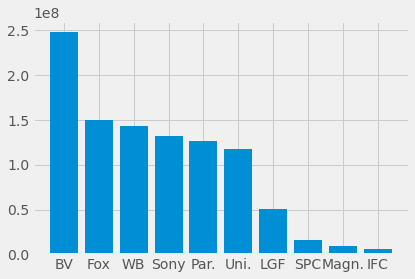

In [140]:
#Barchart for the mean total foreign gross of the studios that made more than 100 titles
fig, ax =plt.subplots()

mpl.style.use('fivethirtyeight')

x= main_st_df.groupby('studio')['foreign_gross'].mean().sort_values(ascending=False)[:10].index
y= main_st_df.groupby('studio')['foreign_gross'].mean().sort_values(ascending=False)[:10].values
ax.bar(x,y)

In [141]:
# BV's gross revenue still leads from both the foreign and domestic markets

## Top Ten Studio by Foreign Revenue

<BarContainer object of 10 artists>

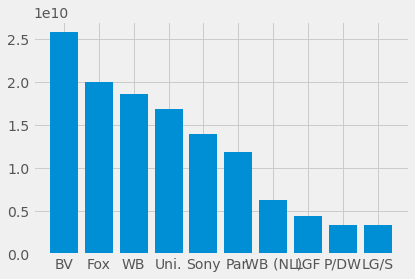

In [142]:
fig, ax =plt.subplots()

mpl.style.use('ggplot')

x= gross_df.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False)[:10].index
y= gross_df.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False)[:10].values
ax.bar(x,y)

In [ ]:
#No significant change

## Total Gross Revenue by year

<BarContainer object of 9 artists>

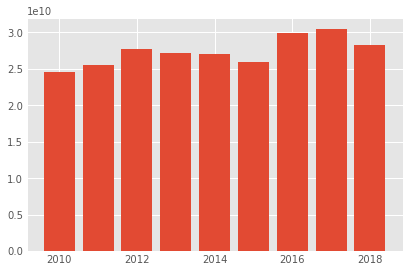

In [143]:
fig, ax =plt.subplots()

mpl.style.use('ggplot')

x= gross_df.groupby('year')['Total Gross Revenue'].sum().sort_values(ascending=False).index
y= gross_df.groupby('year')['Total Gross Revenue'].sum().sort_values(ascending=False).values
ax.bar(x,y)

## Total Domestic Revenue by year

<BarContainer object of 9 artists>

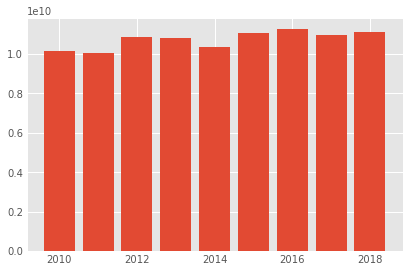

In [144]:
fig, ax =plt.subplots()

mpl.style.use('ggplot')

x= gross_df.groupby('year')['domestic_gross'].sum().sort_values(ascending=False).index
y= gross_df.groupby('year')['domestic_gross'].sum().sort_values(ascending=False).values
ax.bar(x,y)

In [ ]:
#

## Total Foreign Gross Revenue by year

<BarContainer object of 9 artists>

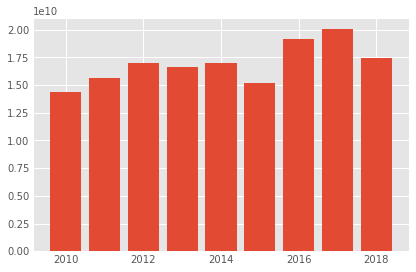

In [145]:
fig, ax =plt.subplots()

mpl.style.use('ggplot')

x= gross_df.groupby('year')['foreign_gross'].sum().sort_values(ascending=False).index
y= gross_df.groupby('year')['foreign_gross'].sum().sort_values(ascending=False).values
ax.bar(x,y)

In [146]:
# 2016 and 2017, stand out as the years with the highest foreign gross revenue generated

In [251]:
#no common columns to perform merge on imdb_names yet
#Revenues = pd.merge(movie_gross, title_akas, on="title")

Revenues

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,region,language,types,attributes,is_original_title
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,15,DK,NaN,NaN,NaN,0.0
1,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,20,UY,NaN,NaN,3-D version,0.0
2,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,21,JP,en,NaN,NaN,0.0
3,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,22,ES,NaN,imdbDisplay,NaN,0.0
4,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,27,NaN,NaN,original,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10904,El Pacto,Sony,2500.0,NaN,2018,tt2040560,8,AR,NaN,imdbDisplay,NaN,0.0
10905,The Swan,Synergetic,2400.0,NaN,2018,tt5764816,1,NaN,NaN,imdbDisplay,NaN,0.0
10906,The Swan,Synergetic,2400.0,NaN,2018,tt5764816,4,SE,NaN,festival,NaN,0.0
10907,An Actor Prepares,Grav.,1700.0,NaN,2018,tt5718046,1,NaN,NaN,original,NaN,1.0


In [213]:
Revenues_domestic = Revenues.sort_values('domestic_gross', ascending=False)

In [214]:
Revenues_domestic.duplicated().sum()

0

In [215]:
Revenues_domestic.isnull().sum()

title                    0
studio                   0
domestic_gross          65
foreign_gross         3550
year                     0
title_id                 0
ordering                 0
region                2337
language              9128
types                 2707
attributes           10551
is_original_title        1
dtype: int64

In [217]:
#Creating Domestic Revenue with justordering


Revenues_domestic.reset_index(drop=True, inplace=True)
Revenues_domestic

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,region,language,types,attributes,is_original_title
0,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,17,CA,en,imdbDisplay,NaN,0.0
1,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,18,DK,NaN,imdbDisplay,NaN,0.0
2,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,39,US,NaN,NaN,poster title,0.0
3,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,3,NO,NaN,imdbDisplay,NaN,0.0
4,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,48,FI,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10904,Viral,W/Dim.,NaN,552000,2016,tt3892200,1,CA,NaN,NaN,NaN,0.0
10905,Viral,W/Dim.,NaN,552000,2016,tt3774802,4,NaN,NaN,imdbDisplay,NaN,0.0
10906,Viral,W/Dim.,NaN,552000,2016,tt9546330,1,XWW,en,NaN,theatrical title,0.0
10907,Secret Superstar,Unknown,NaN,122000000,2017,tt6108090,2,NaN,NaN,original,NaN,1.0


In [254]:
Revenues[]


,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,region,language,types,attributes,is_original_title
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,15,DK,NaN,NaN,NaN,0.0
1,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,20,UY,NaN,NaN,3-D version,0.0
2,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,21,JP,en,NaN,NaN,0.0
3,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,22,ES,NaN,imdbDisplay,NaN,0.0
4,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,27,NaN,NaN,original,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10904,El Pacto,Sony,2500.0,NaN,2018,tt2040560,8,AR,NaN,imdbDisplay,NaN,0.0
10905,The Swan,Synergetic,2400.0,NaN,2018,tt5764816,1,NaN,NaN,imdbDisplay,NaN,0.0
10906,The Swan,Synergetic,2400.0,NaN,2018,tt5764816,4,SE,NaN,festival,NaN,0.0
10907,An Actor Prepares,Grav.,1700.0,NaN,2018,tt5718046,1,NaN,NaN,original,NaN,1.0


In [225]:
Revenues_domestic.head()

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,region,language,types,attributes,is_original_title
0,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,17,CA,en,imdbDisplay,NaN,0.0
1,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,18,DK,NaN,imdbDisplay,NaN,0.0
2,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,39,US,NaN,NaN,poster title,0.0
3,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,3,NO,NaN,imdbDisplay,NaN,0.0
4,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,tt2488496,48,FI,NaN,imdbDisplay,NaN,0.0


In [79]:
Revenues_domestic.shape

(10909, 12)